In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg16 import preprocess_input


In [3]:
model = tf.keras.models.load_model('plant_disease_vgg16.keras')

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

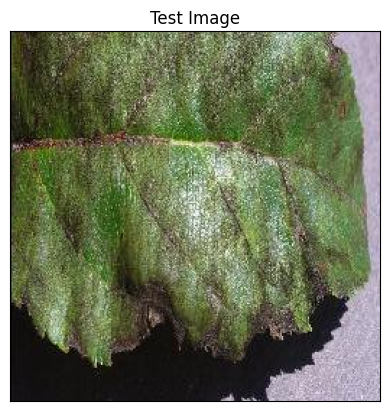

In [5]:
# Read and preprocess the image
image_path = "test/test/AppleScab3.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


In [6]:
# Preprocess image for VGG16
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Convert to batch format
input_arr = preprocess_input(input_arr)  # VGG16 preprocessing

print(input_arr.shape)


(1, 224, 224, 3)


In [7]:
# Make prediction
prediction = model.predict(input_arr)
prediction,prediction.shape


1/1 [==============================] - 4s 4s/step


(array([[9.9272609e-01, 6.2513850e-03, 2.3407159e-08, 7.1044653e-10,
         4.9466451e-12, 8.6649452e-11, 2.9541797e-10, 1.7005799e-06,
         4.6543973e-05, 4.6614508e-07, 1.8525640e-07, 8.8235652e-08,
         2.3849201e-05, 7.9102790e-07, 2.1227135e-05, 3.0412229e-15,
         9.6896297e-11, 2.0485022e-07, 2.4695562e-11, 5.2291399e-10,
         2.0462301e-10, 3.1336089e-09, 3.2897617e-07, 1.0777037e-06,
         8.1544728e-12, 4.0480080e-07, 9.0379553e-04, 3.4248276e-06,
         1.7388021e-12, 1.5410042e-05, 1.3314878e-09, 3.0952714e-12,
         3.8797204e-08, 9.7688496e-11, 1.4062973e-06, 6.9375370e-13,
         1.5999362e-06, 1.4548147e-08]], dtype=float32),
 (1, 38))

In [8]:
result_index = np.argmax(prediction)
result_index

0

In [9]:
# Class labels with descriptions and solutions
disease_info = {
    'Apple___Apple_scab': ("A fungal disease causing dark, scaly lesions on leaves and fruit.", 
                            "Use fungicides like captan, and plant scab-resistant apple varieties."),
    'Apple___Black_rot': ("A fungal infection that causes fruit rot and leaf lesions.", 
                          "Prune infected branches, use copper-based sprays."),
    'Apple___Cedar_apple_rust': ("A fungal disease leading to orange spots on leaves.", 
                                 "Apply fungicides and remove nearby juniper trees."),
    'Apple___healthy': ("No disease detected, plant is healthy.", 
                        "Maintain good watering and soil conditions."),
    'Blueberry___healthy': ("No disease detected, plant is healthy.", 
                            "Ensure proper pruning and soil pH balance."),
    'Cherry_(including_sour)___Powdery_mildew': ("A fungal disease causing white powdery spots.", 
                                                 "Use sulfur-based fungicides and remove infected leaves."),
    'Cherry_(including_sour)___healthy': ("No disease detected, plant is healthy.", 
                                          "Ensure good air circulation and proper watering."),
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': ("A fungal disease causing gray lesions on leaves.", 
                                                           "Use resistant varieties and apply fungicides."),
    'Corn_(maize)___Common_rust_': ("Rust disease leading to reddish-brown pustules on leaves.", 
                                    "Apply fungicides and rotate crops."),
    'Corn_(maize)___Northern_Leaf_Blight': ("Dark lesions on leaves caused by a fungal pathogen.", 
                                            "Use disease-resistant hybrids and fungicides."),
    'Corn_(maize)___healthy': ("No disease detected, plant is healthy.", 
                               "Ensure proper irrigation and nutrient management."),
    'Grape___Black_rot': ("A fungal disease causing black spots on leaves and fruit.", 
                          "Use fungicides and remove infected plant material."),
    'Grape___Esca_(Black_Measles)': ("A fungal disease causing yellow streaks and fruit rot.", 
                                      "Prune infected vines and apply fungicides."),
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': ("A fungal infection causing leaf necrosis.", 
                                                   "Apply copper-based fungicides."),
    'Grape___healthy': ("No disease detected, plant is healthy.", 
                        "Maintain good vineyard hygiene and soil balance."),
    'Orange___Haunglongbing_(Citrus_greening)': ("A bacterial disease spread by psyllids, causing leaf yellowing and fruit deformities.", 
                                                 "Remove infected trees and control psyllid population."),
    'Peach___Bacterial_spot': ("Dark, sunken spots on leaves and fruit caused by bacteria.", 
                               "Use copper-based sprays and disease-free seedlings."),
    'Peach___healthy': ("No disease detected, plant is healthy.", 
                        "Ensure good pruning and avoid overwatering."),
    'Pepper,_bell___Bacterial_spot': ("A bacterial disease causing dark, water-soaked spots.", 
                                      "Use resistant varieties and avoid overhead watering."),
    'Pepper,_bell___healthy': ("No disease detected, plant is healthy.", 
                               "Maintain proper fertilization and pest control."),
    'Potato___Early_blight': ("Dark, concentric rings on leaves caused by a fungal pathogen.", 
                              "Apply fungicides and remove infected leaves."),
    'Potato___Late_blight': ("Water-soaked lesions and rapid decay due to a fungal pathogen.", 
                             "Use resistant varieties and copper fungicides."),
    'Potato___healthy': ("No disease detected, plant is healthy.", 
                         "Ensure proper crop rotation and soil nutrition."),
    'Raspberry___healthy': ("No disease detected, plant is healthy.", 
                            "Maintain well-drained soil and proper pruning."),
    'Soybean___healthy': ("No disease detected, plant is healthy.", 
                          "Use balanced fertilizers and pest control methods."),
    'Squash___Powdery_mildew': ("White powdery growth on leaves caused by fungi.", 
                                "Use sulfur-based sprays and improve air circulation."),
    'Strawberry___Leaf_scorch': ("Brown, dried leaf edges due to fungal infection.", 
                                 "Remove infected leaves and apply fungicides."),
    'Strawberry___healthy': ("No disease detected, plant is healthy.", 
                             "Keep soil well-drained and control pests."),
    'Tomato___Bacterial_spot': ("Dark spots on leaves and fruit due to bacterial infection.", 
                                "Use disease-free seeds and apply copper sprays."),
    'Tomato___Early_blight': ("Brown, concentric rings on leaves due to fungus.", 
                              "Apply fungicides and rotate crops."),
    'Tomato___Late_blight': ("Gray lesions on leaves causing rapid decay.", 
                             "Use resistant varieties and fungicides."),
    'Tomato___Leaf_Mold': ("Yellowing and moldy patches on leaves.", 
                           "Improve ventilation and apply fungicides."),
    'Tomato___Septoria_leaf_spot': ("Small, dark leaf spots caused by fungi.", 
                                    "Use fungicides and remove affected leaves."),
    'Tomato___Spider_mites Two-spotted_spider_mite': ("Tiny mites causing leaf stippling and yellowing.", 
                                                      "Use neem oil and increase humidity."),
    'Tomato___Target_Spot': ("Dark spots with yellow halos on leaves.", 
                             "Apply copper-based fungicides."),
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': ("Virus causing curled and yellow leaves.", 
                                               "Use insect-resistant nets and remove infected plants."),
    'Tomato___Tomato_mosaic_virus': ("Mosaic-like leaf discoloration due to viral infection.", 
                                     "Use virus-free seeds and control aphids."),
    'Tomato___healthy': ("No disease detected, plant is healthy.", 
                         "Ensure good soil nutrition and pest control.")
}

In [10]:
# Get the predicted class name and solution
model_prediction = list(disease_info.keys())[result_index]
disease_description, suggested_solution = disease_info[model_prediction]


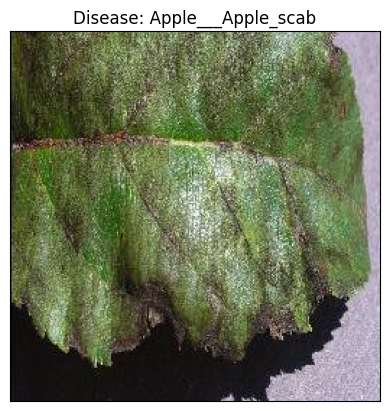

Predicted Disease: Apple___Apple_scab
Description: A fungal disease causing dark, scaly lesions on leaves and fruit.
Suggested Solution: Use fungicides like captan, and plant scab-resistant apple varieties.


In [11]:
# Display result
plt.imshow(img)
plt.title(f"Disease: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

print(f"Predicted Disease: {model_prediction}")
print(f"Description: {disease_description}")
print(f"Suggested Solution: {suggested_solution}")